# Binary Classifier FCNN

This is a fully-connected neural network (FCNN) that compares and classifies two fracture geometry sets. This code was adapted from the 'FCN_demo_part2.ipynb' introduced in class and used in homework 2.

## Initial Data Import and Visualization

This section of the code imports data from a local directory (see variable 'path') and visualizes the waveform stack and average waveforms for each fracture geometry type.

In [1]:
#Import libraries
#------------------

from scipy.signal import find_peaks

from numpy.fft import fft, fftfreq
from scipy import fft
from scipy.fft import rfft, rfftfreq, irfft

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.lines import Line2D

from matplotlib import cm
jet = cm.get_cmap('jet', 256)

import os

import numpy as np
from numpy import unravel_index

import pandas as pd

import matplotlib

import csv
# Show Plot in The Notebook
matplotlib.use("nbagg")

/var/folders/wj/d4lgspxd5gg4nzwr_bj4mjzc0000gn/T/ipykernel_9420/1485272434.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet', 256)


In [2]:
#User-defined functions
#-----------------------
def ImportCSV(file):
    data = pd.read_csv(file, delimiter=',')
    data = data.drop(data.columns[0], axis=1)
    
    data_array = np.zeros((len(data), 850))
    for i in range(0, len(data), 1):
        wave = data.loc[i]
        y = wave[300:1150] #crop down waveforms s.t. -20us => 65us in experimental time
        data_array[i] = y
    
    size = len(data)
    return data_array, size
                
def AvgSignal(data, size):
    total = np.zeros(num_point)
    for i in range(0, size, 1):
        y = data[i]
        total = total + y
        
    avg_sig = total / size
    return avg_sig

In [3]:
path = "/Users/alexclark/Desktop/EnNormCSVData/6.4IncSpc-WSUISBPS"

num_point = 850
toi = 3
pretrig = -20

X = [ pretrig + (float(i) / 10) for i in range(0,num_point) ]

### Water-Saturated Fracture Data

In [4]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("WS"):
        file_path = f"{path}/{file}"
        
        WS, WS_tot = ImportCSV(file_path)
        
avg_WS = AvgSignal(WS, WS_tot)

<IPython.core.display.Javascript object>


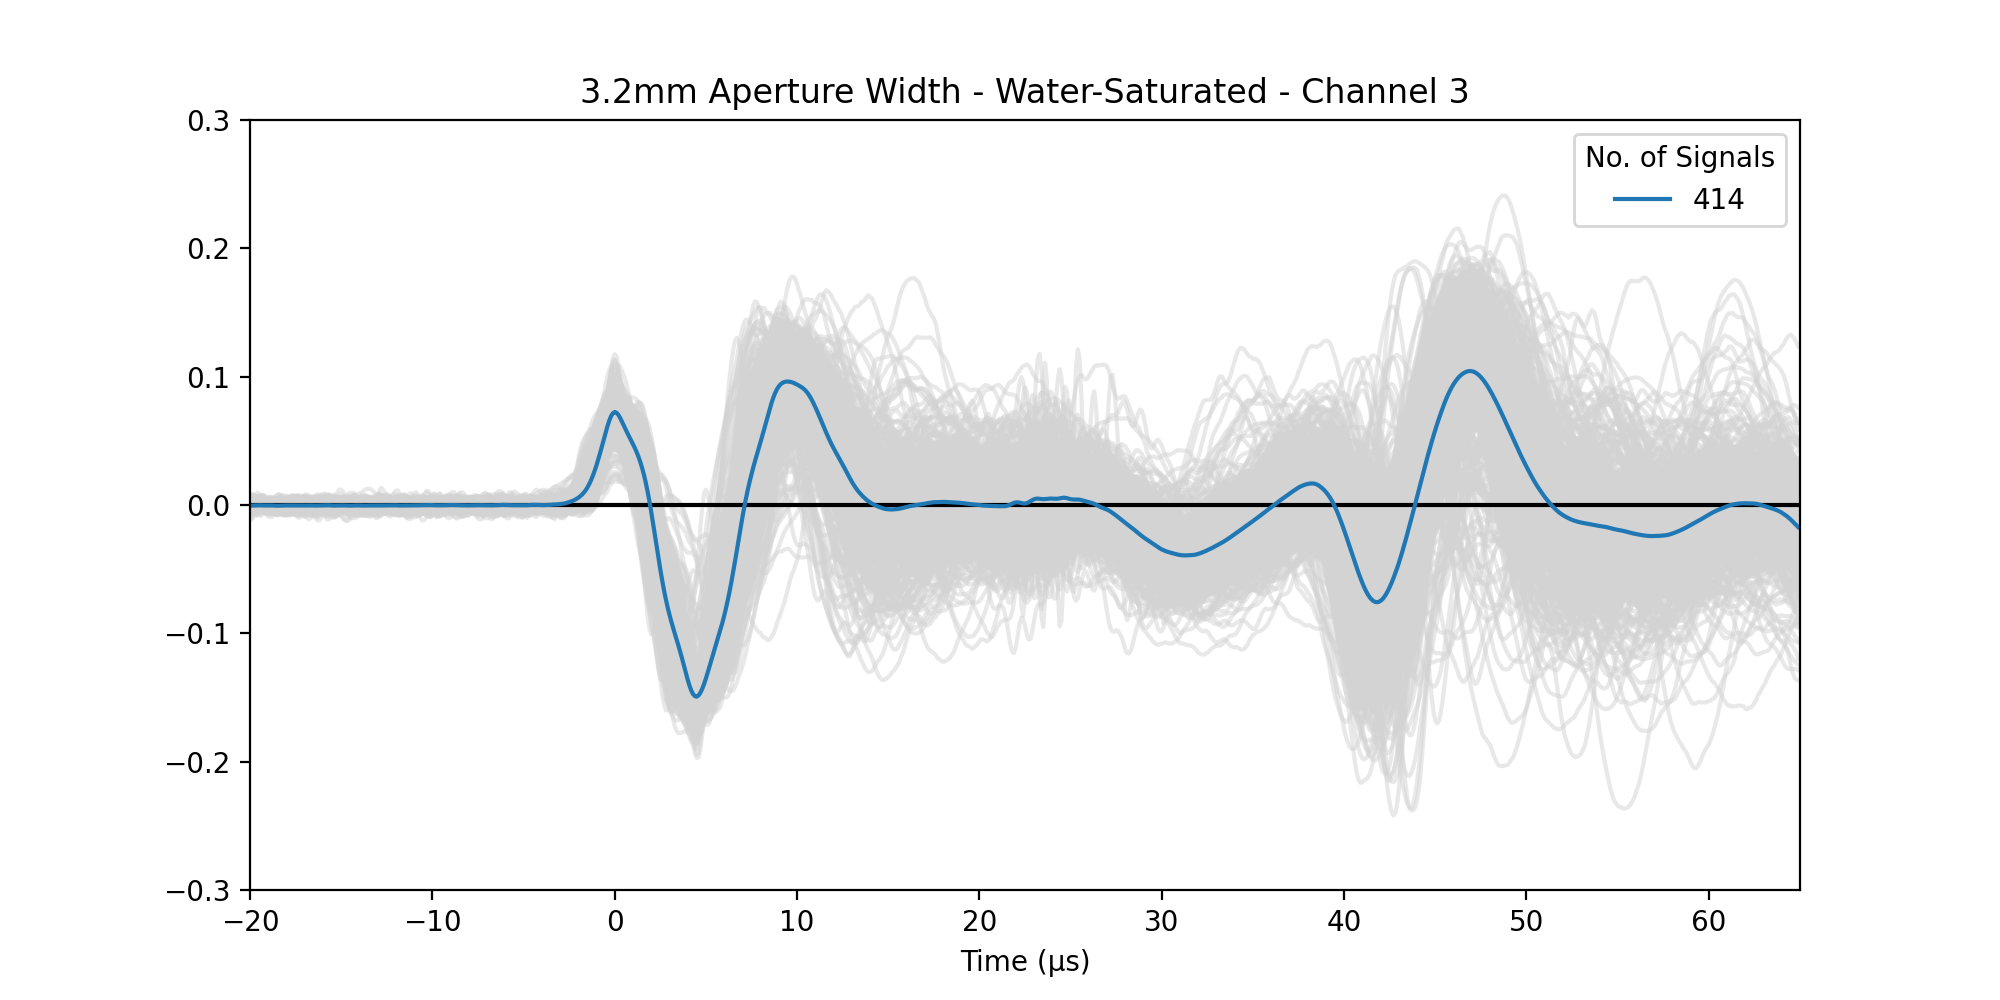

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, WS_tot, 1):
    ax.plot(X, WS[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_WS, color='#1f77b4', label=str(WS_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - Water-Saturated - Channel %d' %toi)

plt.show()

### Uniform Internal Structure (UIS) Data

In [ ]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("UIS25.6"): 
        file_path = f"{path}/{file}"
        
        UIS25, UIS25_tot = ImportCSV(file_path)
        
avg_UIS25 = AvgSignal(UIS25, UIS25_tot)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, UIS25_tot, 1):
    ax.plot(X, UIS25[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_UIS25, color='#ff7f0e', label=str(UIS25_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - UIS 25.6mm CS - Channel %d' %toi)

plt.show()

In [ ]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("UIS12.8"): 
        file_path = f"{path}/{file}"
        
        UIS12, UIS12_tot = ImportCSV(file_path)
        
avg_UIS12 = AvgSignal(UIS12, UIS12_tot)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, UIS12_tot, 1):
    ax.plot(X, UIS12[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_UIS12, color='#2ca02c', label=str(UIS12_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - UIS 12.8mm CS - Channel %d' %toi)

plt.show()

In [ ]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("UIS6.4"): 
        file_path = f"{path}/{file}"
        
        UIS6, UIS6_tot = ImportCSV(file_path)
        
avg_UIS6 = AvgSignal(UIS6, UIS6_tot)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, UIS6_tot, 1):
    ax.plot(X, UIS6[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_UIS6, color='#d62728', label=str(UIS6_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - UIS 6.4mm CS - Channel %d' %toi)

plt.show()

### Bi-periodic Structure (BPS) Data

In [ ]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("6.4-12.8"):
        file_path = f"{path}/{file}"
        
        BPS6_12, BPS6_12_tot = ImportCSV(file_path)
        
avg_BPS6_12 = AvgSignal(BPS6_12, BPS6_12_tot)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, BPS6_12_tot, 1):
    ax.plot(X, BPS6_12[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_BPS6_12, color='#9467bd', label=str(BPS6_12_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - BPS 6.4/12.8mm - Channel %d' %toi)

plt.show()

In [ ]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("6.4-25.6"):
        file_path = f"{path}/{file}"
        
        BPS6_25, BPS6_25_tot = ImportCSV(file_path)
        
avg_BPS6_25 = AvgSignal(BPS6_25, BPS6_25_tot)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, BPS6_25_tot, 1):
    ax.plot(X, BPS6_25[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_BPS6_25, color='#8c564b', label=str(BPS6_25_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - BPS 6.4/25.6mm - Channel %d' %toi)

plt.show()

In [ ]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("12.8-25.6"):
        file_path = f"{path}/{file}"
        
        BPS12_25, BPS12_25_tot = ImportCSV(file_path)
        
avg_BPS12_25 = AvgSignal(BPS12_25, BPS12_25_tot)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in range(0, BPS12_25_tot, 1):
    ax.plot(X, BPS12_25[i], color='lightgray', alpha=0.5)

ax.axhline(y=0, color='black')
ax.plot(X, avg_BPS12_25, color='#e377c2', label=str(BPS12_25_tot))

ax.legend(title='No. of Signals', loc='upper right')

ax.set_xlim([-20, 65])
ax.set_ylim([-0.3, 0.3])

ax.set_xlabel('Time (\u03bcs)')
ax.set_title('3.2mm Aperture Width - BPS 12.8/25.6mm - Channel %d' %toi)

plt.show()

## Waveform Stack

In [ ]:
tot_sig = WS_tot+UIS25_tot+UIS12_tot+UIS6_tot+BPS6_12_tot+BPS6_25_tot+BPS12_25_tot
Z = np.concatenate((WS, UIS25, UIS12, UIS6, BPS6_12, BPS6_25, BPS12_25))

fig, ax = plt.subplots(1, 1, figsize=(12,5))

pretrig = -20
X = [ pretrig + (float(i) / 10) for i in range(0,num_point) ]
Y = np.arange(0, tot_sig, 1)

clrmap = plt.contourf(X, Y, Z, 256, cmap=jet)

ax.axhline(WS_tot, color='black')
ax.axhline((WS_tot+UIS25_tot), color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot, color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot+UIS6_tot, color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot+UIS6_tot+BPS6_12_tot, color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot+UIS6_tot+BPS6_12_tot+BPS6_25_tot, color='black')

ax.set_xlim([-20, 65])

#labeling graph
ax.set_xlabel('Time (\u03bcs)')
ax.set_title('Waveform Stack - 3.2mm Aperture Width - Channel %d ' % toi)

plt.show()
print(len(Z))

## Average Signals for Each Geometry

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(X, avg_WS, label='WS')
ax.plot(X, avg_UIS25+0.1, label='25.6 CS')
ax.plot(X, avg_UIS12+0.2, label='12.8 CS')
ax.plot(X, avg_UIS6+0.3, label='6.4 CS')
#ax.plot(X, avg_BPS6_12+0.4, label='6.4/12.8 BPS')
#ax.plot(X, avg_BPS6_25+0.5, label='6.4/25.6 BPS')
#ax.plot(X, avg_BPS12_25+0.6, label='12.8/25.6 BPS')

ax.set_xlim([-20, 65])
ax.set_xlabel('Time (\u03bcs)')
ax.legend(title='Experiment', loc='upper left')

ax.set_title('Average Waveforms - 3.2mm Aperture Width - Channel %d' %toi)

plt.show()

# Neural Network

This section is where the neural network is designed and built to train/test classification on the above imported datasets.

### Labeling data for classification

In [ ]:
#Number labels for each geometry class
WS_num = 0
UIS25_num = 1
#UIS12_num = 0
#UIS6_num = 1
#BPS6_12_num = 4
#BPS6_25_num = 5
#BPS12_25_num = 6

#defining arrays same size as total number of waveforms per geometry class
WS_num_array = np.ones((WS_tot))
UIS25_num_array = np.ones((UIS25_tot))
#UIS12_num_array = np.zeros((UIS12_tot))
#UIS6_num_array = np.zeros((UIS6_tot))
#BPS6_12_num_array = np.ones(BPS6_12_tot)
#BPS6_25_num_array = np.ones(BPS6_25_tot)
#BPS12_25_num_array = np.ones(BPS12_25_tot)

#array with label for each class
WS_num_array = WS_num * WS_num_array
UIS25_num_array = UIS25_num * UIS25_num_array
#UIS12_num_array = UIS12_num * UIS12_num_array
#UIS6_num_array = UIS6_num * UIS6_num_array
#BPS6_12_num_array = BPS6_12_num * BPS6_12_num_array
#BPS6_25_num_array = BPS6_25_num * BPS6_25_num_array
#BPS12_25_num_array = BPS12_25_num * BPS12_25_num_array

In [ ]:
#Datasets : concatenate the data classes of interest
#---------------------------------------------------
X = np.concatenate((WS, UIS25))#, UIS12, UIS6)) #WS, UIS25 ; the waveforms of geometry classes of interest
Y = np.concatenate((WS_num_array, UIS25_num_array))#, UIS12_num_array, UIS6_num_array)) #WS_num_array, UIS25_num_array, ; classification labels
#Y = np.concatenate((WS_num_array, UIS25_num_array, UIS12_num_array, UIS6_num_array, BPS6_12_num_array, BPS6_25_num_array, BPS12_25_num_array), axis=None)
Y = Y.astype('float32').reshape((-1,1))

print(len(X))
print(len(Y))

print('Input: ', X)
print('Class: ', Y)

### Splitting data into training and testing sets

In [ ]:
import torch
from sklearn.model_selection import train_test_split

X = torch.Tensor(X)
Y = torch.Tensor(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

In [ ]:
from torch import Tensor
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, X: Tensor, labels: Tensor):
    self.X = X
    self.Y = labels
  def __len__(self):
      return self.X.shape[0]
  def __getitem__(self, idx: int):
    x = self.X[idx]
    label = self.Y[idx]
    return x, label

dataset_train = CustomDataset(X_train, Y_train)
train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle=True)

dataset_test = CustomDataset(X_test, Y_test)
test_dataloader = DataLoader(dataset_test, batch_size=32, shuffle=True)

In [ ]:
import torch.nn as nn

input_dim = X_train.shape[-1]
hidden_dim = 100
n_hidden_layers = 3

nn_blocks = []
#nn_blocks.append(nn.BatchNorm1d(input_dim)) #normalizes
nn_blocks.append(nn.Linear(input_dim, hidden_dim)) # add input layer

for _ in range(n_hidden_layers): # add hidden layers
  nn_blocks.append(nn.ReLU())
  #nn_blocks.append(nn.BatchNorm1d(hidden_dim)) #adding the batch normalization
  nn_blocks.append(nn.Linear(hidden_dim, hidden_dim))
# add the last layer
nn_blocks.append(nn.ReLU())
nn_blocks.append(nn.Linear(hidden_dim, 1))

nn_blocks.append(nn.Sigmoid()) # sigmoid at the end for BINARY classification

FCN_model = nn.Sequential(*nn_blocks)

print(FCN_model)

## Training

In [ ]:
loss_vals = []
FCN_model.train() # put model in train mode
#-----BINARY-----------
optimizer = torch.optim.AdamW(FCN_model.parameters(), lr=1e-3) 
loss_fcn = nn.BCELoss()

i = 0
for x, y in train_dataloader:
  model_output = FCN_model(x)
  loss = loss_fcn(model_output, y)
  i +=1

  optimizer.zero_grad() # this deletes all gradient calculations from previous backpropagation
  loss.backward() # calculates the gradients
  optimizer.step() # applies backpropagation
  loss_vals.append(loss)

## Testing

In [ ]:
#FOR BINARY CLASSIFIER (select only two geometry classes)

from sklearn import metrics
import matplotlib.pyplot as plt

FCN_model.eval() #model into eval mode
with torch.no_grad():
  #print(Y_test)
  #print(FCN_model(X_test))
  fpr, tpr, _ = metrics.roc_curve( Y_test,  FCN_model(X_test)) 
  auc = metrics.roc_auc_score(Y_test, FCN_model(X_test))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Trained Model Binary Classification')
plt.legend(loc=4)

plt.show()

The binary classification of two fracture geometries does fairly well according to the ROC curve and AUC score.